In [8]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FIGSIZE = (10,5)
# Lista de configurações para testar
# Ordem: taxa_chegada, tempo_medio, num_servidores, tempo_observação
CENARIOS_QUESTAO_2 = [[x, 0.88, 10, 10] for x in range(1, 15, 1)]

def rodar_simulador(taxa_chegada, tempo_medio_servico, num_servidores, tempo_observacao):
    comando = [
        "java", "-cp", "bin:lib/*", "ServidorWeb",
        str(taxa_chegada), 
        str(tempo_medio_servico), 
        str(num_servidores), 
        str(tempo_observacao)
    ]

    resultado = subprocess.run(comando, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Divide a saída em linhas
    linhas = resultado.stdout.splitlines()

    # Captura a primeira e a segunda linha (se existirem)
    primeira_saida = linhas[0] if len(linhas) > 0 else None
    segunda_saida = linhas[1] if len(linhas) > 1 else None

    return primeira_saida, segunda_saida, resultado.stderr


In [9]:
dados = []
colunas = None

for cenario in CENARIOS_QUESTAO_2:
    print(f'Testando cenario: {cenario}')
    saida1, saida2, erro = rodar_simulador(*cenario)

    if saida1 and saida2:
        if colunas is None:
            colunas = saida1.split()

        valores = saida2.split()
        dados.append(valores)
df = pd.DataFrame(dados, columns=colunas)

DEFAULT_FILE_NAME = "saida_simulador.csv"
df.to_csv(f"{DEFAULT_FILE_NAME}", index=False, sep=";")

print(f"CSV gerado com sucesso: {DEFAULT_FILE_NAME}")

Testando cenario: [1, 0.88, 10, 10]
Testando cenario: [2, 0.88, 10, 10]
Testando cenario: [3, 0.88, 10, 10]
Testando cenario: [4, 0.88, 10, 10]
Testando cenario: [5, 0.88, 10, 10]
Testando cenario: [6, 0.88, 10, 10]
Testando cenario: [7, 0.88, 10, 10]
Testando cenario: [8, 0.88, 10, 10]
Testando cenario: [9, 0.88, 10, 10]
Testando cenario: [10, 0.88, 10, 10]
Testando cenario: [11, 0.88, 10, 10]
Testando cenario: [12, 0.88, 10, 10]
Testando cenario: [13, 0.88, 10, 10]
Testando cenario: [14, 0.88, 10, 10]
CSV gerado com sucesso: saida_simulador.csv


In [10]:
questao_2_df = pd.read_csv(DEFAULT_FILE_NAME, sep=";", decimal=",")
questao_2_df = questao_2_df.sort_values(by="TaxaDeChegadaMedia", ascending=True)

# Usando o modelo questão 2

Taxa de chegada = 1, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 2, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 3, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 4, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 5, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 6, Tempo médio de resposta W = 0.01 seg
Taxa de chegada = 7, Tempo médio de resposta W = 0.03 seg
Taxa de chegada = 8, Tempo médio de resposta W = 0.10 seg
Taxa de chegada = 9, Tempo médio de resposta W = 0.31 seg
Taxa de chegada = 10, Tempo médio de resposta W = 0.88 seg
Taxa de chegada = 11, Tempo médio de resposta W = 2.27 seg
Taxa de chegada = 12, Tempo médio de resposta W = 5.41 seg
Taxa de chegada = 13, Tempo médio de resposta W = 12.03 seg
Taxa de chegada = 14, Tempo médio de resposta W = 25.23 seg


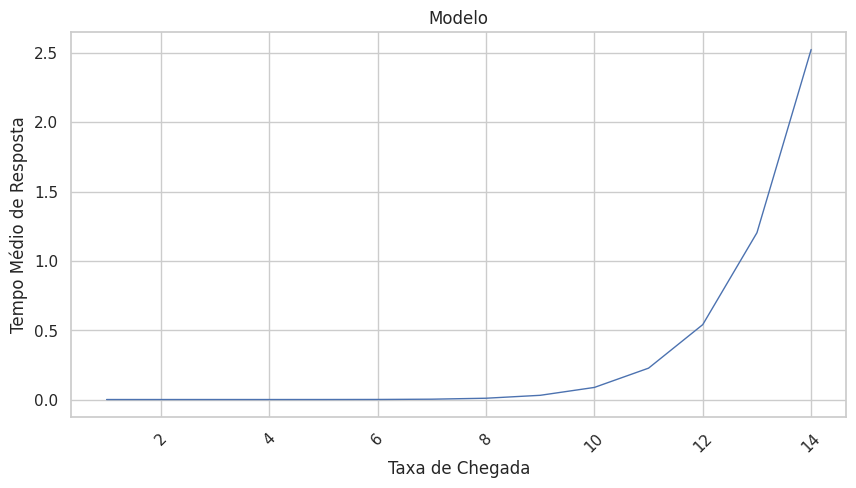

In [11]:
def fatorial(n):
    if n == 0 or n == 1:
        return 1
    resultado = 1
    for i in range(2, n + 1):
        resultado *= i
    return resultado

def calculo_modelo(taxaChegada, tempoServico, numServidores):
    c = numServidores
    taxaServico = 1 / tempoServico
    u = taxaServico
    p=taxaChegada / c * u
    sum_term = sum((taxaChegada / taxaServico) ** n / fatorial(n) for n in range(numServidores))
    P0 = 1 / (sum_term + ((taxaChegada / taxaServico) ** numServidores / (fatorial(numServidores) * (1 - p))))


    Pq = (taxaChegada/u) ** c / fatorial(c) * 1 / 1 - p * P0
    Lq = Pq * p / 1 - p
    W = (Lq / taxaChegada) + (1 / taxaServico)
    
    return W

# Testando para diferentes taxas de chegada usando o modelo
taxa_chegada = list(range(1, 15, 1))

tempo_servico_q_3 = 0.88
num_servidores = 10

resultados_modelo_q_3 = []
for num_serv in taxa_chegada:
    W = calculo_modelo(num_serv, tempo_servico_q_3, num_servidores)
    resultados_modelo_q_3.append({"Taxa de Chegada": num_serv, "Tempo Médio de Resposta": W/1000})
    print(f"Taxa de chegada = {num_serv}, Tempo médio de resposta W = {W/100:.2f} seg")

df_resultados = pd.DataFrame(resultados_modelo_q_3)

plt.figure(figsize=(FIGSIZE))
sns.set_theme(style="whitegrid")
plt.title('Modelo')
sns.lineplot(data=df_resultados, x="Taxa de Chegada", y="Tempo Médio de Resposta", linewidth=1)
plt.xticks(rotation=45)
plt.show()



# Usando a simulação

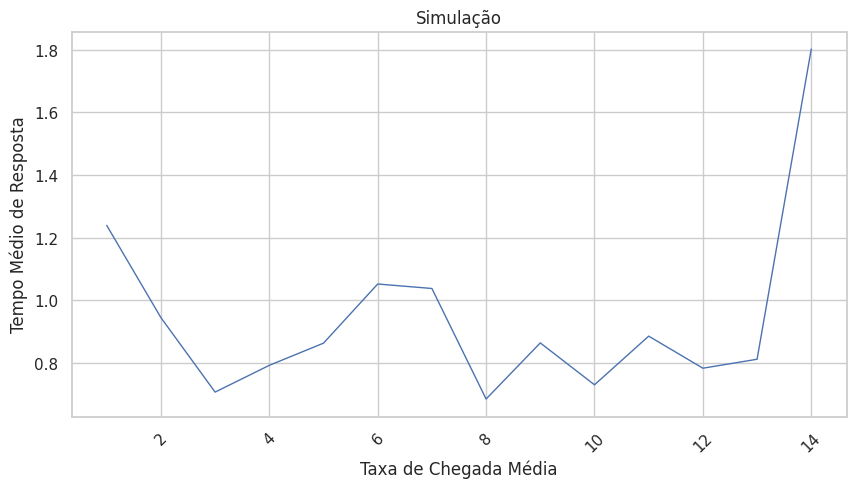

In [12]:
questao_2_df = questao_2_df.sort_values(by="TempoMedioDeResposta", ascending=False)

plt.figure(figsize=(FIGSIZE))
sns.set_theme(style="whitegrid")
plt.title('Simulação')
sns.lineplot(data=questao_2_df, x="TaxaDeChegadaMedia", y="TempoMedioDeResposta", linewidth=1)
plt.xlabel('Taxa de Chegada Média')
plt.ylabel('Tempo Médio de Resposta')
plt.xticks(rotation=45)
plt.show()


In [13]:
questao_2_df

,TaxaDeChegadaMedia,TempoDeServicoMedio,NumServidores,RequisicoesSubmetidas,RequisicoesConcluidas,TempoMedioDeResposta,TamanhoMedioDaFila
13,14.0,0.88,10,139,102,1.802550,15.941176
0,1.0,0.88,10,10,10,1.239431,0.000000
5,6.0,0.88,10,74,72,1.052317,0.944444
6,7.0,0.88,10,65,65,1.038015,0.071295
1,2.0,0.88,10,15,15,0.944931,0.000000
10,11.0,0.88,10,116,111,0.885878,1.252252
8,9.0,0.88,10,94,94,0.864233,0.666667
4,5.0,0.88,10,43,43,0.863477,0.000000
12,13.0,0.88,10,113,113,0.812056,2.094828
3,4.0,0.88,10,64,64,0.792657,0.000000


# questão 3

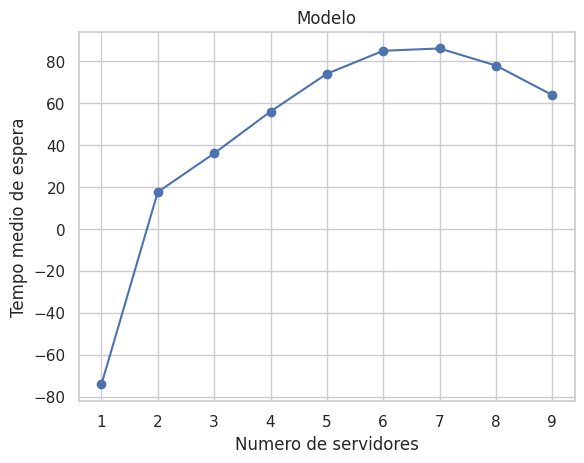

In [24]:
taxa_chegada = 9.4
tempoServico = 0.88
num_servidores = list(range(1, 10, 1))

resultados = []

for num_serv in num_servidores:
    W = calculo_modelo(taxa_chegada, tempoServico, num_serv)
    resultados.append(W)

plt.plot(num_servidores, resultados, marker='o', linestyle='-', color='b')
plt.title('Modelo')
plt.xlabel('Numero de servidores')
plt.ylabel('Tempo medio de espera')
plt.xticks(num_servidores)
plt.grid(True)
plt.show()

# Simulação questão 3

In [15]:
# Lista de configurações para testar
# Ordem: taxa_chegada, tempo_medio, num_servidores, tempo_observação
CENARIOS_QUESTAO_3 = [[1, 0.88, x, 10] for x in range(1, 15, 1)]  # Variando o número de servidores

dados = []
colunas = None

for cenario in CENARIOS_QUESTAO_3:
    print(f'Testando cenario: {cenario}')
    saida1, saida2, erro = rodar_simulador(*cenario)

    if saida1 and saida2:
        if colunas is None:
            colunas = saida1.split()

        valores = saida2.split()
        dados.append(valores)

df = pd.DataFrame(dados, columns=colunas)

DEFAULT_FILE_NAME = "saida_simulador2.csv"
df.to_csv(f"{DEFAULT_FILE_NAME}", index=False, sep=";")

print(f"CSV gerado com sucesso: {DEFAULT_FILE_NAME}")


Testando cenario: [1, 0.88, 1, 10]
Testando cenario: [1, 0.88, 2, 10]
Testando cenario: [1, 0.88, 3, 10]
Testando cenario: [1, 0.88, 4, 10]
Testando cenario: [1, 0.88, 5, 10]
Testando cenario: [1, 0.88, 6, 10]
Testando cenario: [1, 0.88, 7, 10]
Testando cenario: [1, 0.88, 8, 10]
Testando cenario: [1, 0.88, 9, 10]
Testando cenario: [1, 0.88, 10, 10]
Testando cenario: [1, 0.88, 11, 10]
Testando cenario: [1, 0.88, 12, 10]
Testando cenario: [1, 0.88, 13, 10]
Testando cenario: [1, 0.88, 14, 10]
CSV gerado com sucesso: saida_simulador2.csv


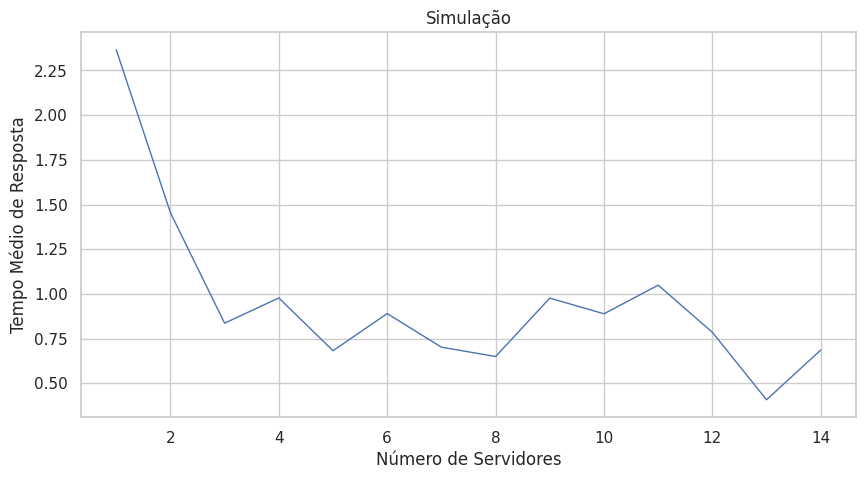

In [20]:
df = pd.read_csv(f"{DEFAULT_FILE_NAME}", sep=";", decimal=",")

df = df.sort_values(by="TempoMedioDeResposta", ascending=False)
plt.figure(figsize=FIGSIZE)
sns.set_theme(style="whitegrid")
plt.title('Simulação')
sns.lineplot(data=df, x="NumServidores", y="TempoMedioDeResposta", linewidth=1)
plt.xlabel('Número de Servidores')
plt.ylabel('Tempo Médio de Resposta')
plt.show()

In [34]:
valores_menores_que_1 = df[df['TempoMedioDeResposta'] < 1]
valores_menores_que_1 = valores_menores_que_1.sort_index()
valores_menores_que_1

,TaxaDeChegadaMedia,TempoDeServicoMedio,NumServidores,RequisicoesSubmetidas,RequisicoesConcluidas,TempoMedioDeResposta,TamanhoMedioDaFila
2,1.0,0.88,3,9,9,0.836396,0.0
3,1.0,0.88,4,6,6,0.977572,0.0
4,1.0,0.88,5,3,3,0.682364,0.0
5,1.0,0.88,6,8,8,0.890128,0.0
6,1.0,0.88,7,8,8,0.702232,0.0
7,1.0,0.88,8,5,5,0.649983,0.0
8,1.0,0.88,9,9,9,0.976639,0.0
9,1.0,0.88,10,7,7,0.888928,0.0
11,1.0,0.88,12,12,12,0.785203,0.0
12,1.0,0.88,13,8,8,0.408099,0.0
